## Imports, as always!

In [1]:
import logging
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt

from corpora import *
from my_utils import *
import score

## Parsing Corpora

In [3]:
corpora_path = '../EuroSense/eurosense.v1.0.high-precision.xml'
bn2wn_mapping_path = '../resources/bn2wn_mapping.txt'
outfile_path = './EuroSense/parsed_lower/sentences_precision.txt'

parse(corpora_path, bn2wn_mapping_path, outfile_path, "precision")
#1,903,116 sentences

1,903,116 sentences extracted...
Done!


In [ ]:
corpora_path = '../EuroSense/EuroSense/eurosense.v1.0.high-coverage.xml'
bn2wn_mapping_path = '../resources/bn2wn_mapping.txt'
outfile_path = '../EuroSense/parsed_lower/sentenses_coverage.txt'

parse(corpora_path, bn2wn_mapping_path, outfile_path, "coverage")
#1,903,181 sentences

In [2]:
bn2wn_mapping_path = '../resources/bn2wn_mapping.txt'
sentences_p = InputSentences('../EuroSense/parsed_low_stp/sentences_precision.txt')
sentences_c = InputSentences('../EuroSense/parsed_low_stp/sentences_coverage.txt')
sentences_folder = InputSentences('../EuroSense/parsed_low_stp/')
test_data_path = "../wordsim353/combined.tab"

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Training the Model; Parameter Tuning

All tunings are done with the following parameters:

dataset = precision; min_count = 5; workers = 5; score for words not found = -1

### 1. Tuning 'window'
size = 400 (from the reference paper); alpha = 0.025; iter = 5 (default)

In [3]:
windows = [3, 5, 6, 8, 10]
correlations = []
pvals = []

In [ ]:
for windw in windows:
    embeddings_path = "../resources/embeddings_win{}.vec".format(windw)
    
    model_win = Word2Vec(sentences_p, size=400, workers=5, window=windw)
    save_embeddings(embeddings_path, model_win.wv)
    
    corr, p, data = score.spearman(test_data_path, embeddings_path)
    correlations.append(corr)
    pvals.append(p)

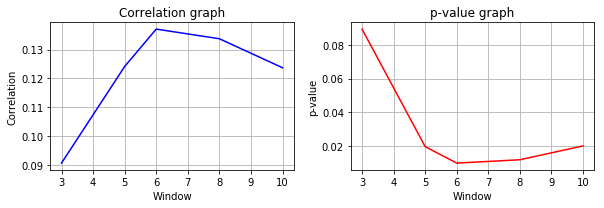

[0.26100232563012454]
[6.597456085045413e-07]


In [88]:
del model_win
fig = plt.gcf()
fig.set_size_inches(8.5, 3)

plt.subplot(1, 2, 1)
plt.plot(windows, correlations, 'b')
plt.xlabel('Window')
plt.ylabel('Correlation')
plt.title("Correlation graph")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(windows, pvals, 'r')
plt.xlabel('Window')
plt.ylabel('p-value')
plt.title("p-value graph")
plt.grid()

plt.tight_layout()
plt.show()

print(correlations)
print(pvals)

### 2. High precision corpus vs High coverage corpus vs Combined (not uniquely)
window = 6; size = 400 (from the reference paper); alpha = 0.025; iter = 5 (default)

In [26]:
names = ["Precision", "Coverage", "Combined"]
correlations = []
pvals = []

In [ ]:
embeddings_path = "../resources/embeddings_precision.vec"
model_precision = Word2Vec(sentences_p, size=400, workers=5, window=6)
save_embeddings(embeddings_path, model_precision.wv)

corr, p, data = score.spearman(test_data_path, embeddings_path)
correlations.append(corr)
pvals.append(p)
#=========================================
embeddings_path = "../resources/embeddings_coverage.vec"
model_coverage = Word2Vec(sentences_c, size=400, workers=5, window=6)
save_embeddings(embeddings_path, model_coverage.wv)

corr, p, data = score.spearman(test_data_path, embeddings_path)
correlations.append(corr)
pvals.append(p)
#=========================================
embeddings_path = "../resources/embeddings_combined.vec"
model_comb = Word2Vec(sentences_folder, size=400, workers=5, window=6)
save_embeddings(embeddings_path, model_comb.wv)

corr, p, data = score.spearman(test_data_path, embeddings_path)
correlations.append(corr)
pvals.append(p)

In [29]:
print("Vocab size for high precision data is: {:,d}".format(len(model_precision.wv.vocab)))
print("Vocab size for high coverage data is: {:,d}".format(len(model_coverage.wv.vocab)))
print("Vocab size for the combined data is: {:,d}".format(len(model_comb.wv.vocab)))

del model_precision
del model_coverage
del model_comb

Vocab size for high precision data is: 61,693
Vocab size for high coverage data is: 60,933
Vocab size for the combined data is: 86,482


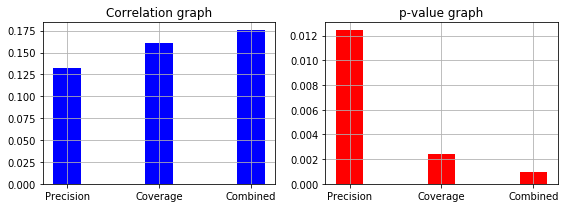

[0.1328997636846252, 0.16103731239116484, 0.17566626310041306]
[0.012447440842243446, 0.0024076274352001934, 0.0009178285065600792]


In [69]:
bar_width = 0.3
pos1 = np.arange(len(correlations))
pos2 = [x + bar_width for x in pos1]

fig = plt.gcf()
fig.set_size_inches(8, 3)

plt.subplot(1, 2, 1)
plt.bar(pos1, correlations, color='blue', width=bar_width)
plt.title("Correlation graph")
plt.xticks([y for y in range(len(correlations))], names)
plt.grid()

plt.subplot(1, 2, 2)
plt.bar(pos2, _pvals, color='red', width=bar_width)
plt.title("p-value graph")
plt.xticks([y + bar_width for y in range(len(correlations))], names)
plt.grid()

plt.tight_layout()
plt.show()

print(correlations)
print(pvals)

### 3. Tuning vector 'size'
window = 6; alpha = 0.025; iter = 5 (default); combined dataset

In [31]:
sizes = [100, 200, 300, 400, 500, 600]
correlations = []
pvals = []

In [ ]:
for s in sizes:
    embeddings_path = "../resources/embeddings_size{}.vec".format(s)
    
    model_size = Word2Vec(sentences_folder, workers=5, size=s, window=6)
    save_embeddings(embeddings_path, model_size.wv)
    
    corr, p, data = score.spearman(test_data_path, embeddings_path)
    correlations.append(corr)
    pvals.append(p)

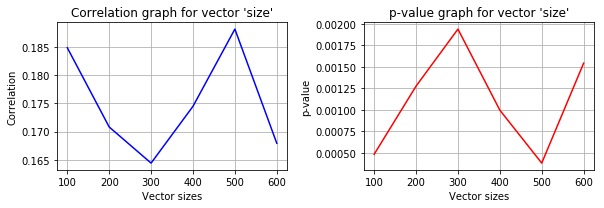

[0.18482882260978845, 0.17081055797772945, 0.1644249983301631, 0.17447065509094467, 0.18812549418747526, 0.16793873273427085]
[0.00048226052458377565, 0.0012749327144777407, 0.0019389377650786733, 0.0009959758304877936, 0.00037970453160762627, 0.0015422694092686938]


In [59]:
del model_size
fig = plt.gcf()
fig.set_size_inches(8.5, 3)

plt.subplot(1, 2, 1)
plt.plot(sizes, correlations, 'b')
plt.xlabel('Vector sizes')
plt.ylabel('Correlation')
plt.title("Correlation graph for vector 'size'")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(sizes, pvals, 'r')
plt.xlabel('Vector sizes')
plt.ylabel('p-value')
plt.title("p-value graph for vector 'size'")
plt.grid()

plt.tight_layout()
plt.show()

print(correlations)
print(pvals)

### 4.1. Tuning starting 'alpha'
size = 500; window = 6; iter = 5 (default)

In [67]:
alphas = [0.02, 0.04, 0.06, 0.08, 0.1]
correlations = []
pvals = []

In [ ]:
for alph in alphas:
    embeddings_path = "../resources/embeddings_alpha{}.vec".format(alph)
    
    model_alph = Word2Vec(sentences_folder, workers=5, size=500, window=6, alpha=alph)
    save_embeddings(embeddings_path, model_alph.wv)
    
    corr, p, data = score.spearman(test_data_path, embeddings_path)
    correlations.append(corr)
    pvals.append(p)

In [89]:
alphas = [0.02, 0.04, 0.06, 0.08, 0.1]
_correlations = []
_pvals = []

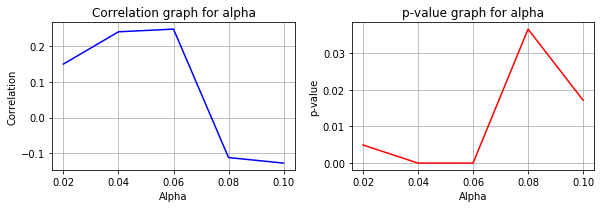

[0.26100232563012454]
[6.597456085045413e-07]


In [91]:
del model_alph

fig = plt.gcf()
fig.set_size_inches(8.5, 3)

plt.subplot(1, 2, 1)
plt.plot(alphas, correlations, 'b')
plt.xlabel('Alpha')
plt.ylabel('Correlation')
plt.title("Correlation graph for alpha")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(alphas, pvals, 'r')
plt.xlabel('Alpha')
plt.ylabel('p-value')
plt.title("p-value graph for alpha")
plt.grid()

plt.tight_layout()
plt.show()

print(correlations)
print(pvals)

### 4.2. Tuning starting 'alpha'
size = 500; window = 6; iter = 5 (default)

In [92]:
alphas = [0.005, 0.007, 0.009, 0.01, 0.02]
correlations = []
pvals = []

In [ ]:
for alph in alphas:
    embeddings_path = "../resources/embeddings_alpha{}.vec".format(alph)
    
    model_alph = Word2Vec(sentences_folder, workers=5, size=500, window=6, alpha=alph)
    save_embeddings(embeddings_path, model_alph.wv)
    
    corr, p, data = score.spearman(test_data_path, embeddings_path)
    correlations.append(corr)
    pvals.append(p)

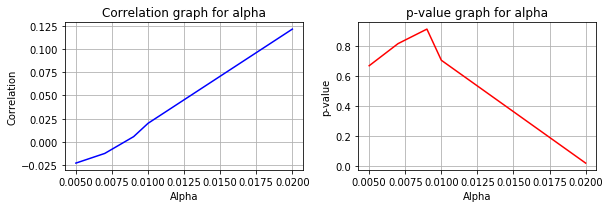

[-0.02271037008346432, -0.012308103696220136, 0.005739443758655788, 0.02007408333515987, 0.12138840404542614]
[0.6706686095111363, 0.8177523699985041, 0.9144297926764244, 0.7070225137185358, 0.022546492097061666]


In [94]:
#del model_alph

fig = plt.gcf()
fig.set_size_inches(8.5, 3)

plt.subplot(1, 2, 1)
plt.plot(alphas, correlations, 'b')
plt.xlabel('Alpha')
plt.ylabel('Correlation')
plt.title("Correlation graph for alpha")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(alphas, pvals, 'r')
plt.xlabel('Alpha')
plt.ylabel('p-value')
plt.title("p-value graph for alpha")
plt.grid()

plt.tight_layout()
plt.show()

print(correlations)
print(pvals)

### 5. Tuning epochs 'iter'
alpha = 0.009; size = 500; window = 6;

In [5]:
epochs = [30]
correlations = []
pvals = []

In [ ]:
for epoch in epochs:
    embeddings_path = "../resources/embeddings_epochs{}.vec".format(epoch)
    
    model_iter = Word2Vec(sentences_folder, workers=5, size=500, window=6, iter=epoch)
    save_embeddings(embeddings_path, model_iter.wv)
    
    corr, p, data = score.spearman(test_data_path, embeddings_path)
    correlations.append(corr)
    pvals.append(p)

In [99]:
correlations

[0.2448334698902266]

In [ ]:
#epochs = [40, 50]

epochs = [30]
# correlations = []
# pvals = []

model_iter = Word2Vec(sentences_folder, workers=5, size=500, window=6, alpha=0.03, iter=30)
save_embeddings(embeddings_path, model_iter.wv)

corr, p, data = score.spearman(test_data_path, embeddings_path)
correlations.append(corr)
pvals.append(p)

In [ ]:
print(embeddings_path)
for epoch in epochs:
    embeddings_path = "../resources/embeddings_epochs{}.vec".format(epoch)
    
    model_iter = Word2Vec(sentences_folder, workers=5, size=500, window=6, iter=epoch)
    save_embeddings(embeddings_path, model_iter.wv)
    
    corr, p, data = score.spearman(test_data_path, embeddings_path)
    correlations.append(corr)
    pvals.append(p)

In [102]:
# del model_iter

# plt.plot(alphas, correlations, 'b', alphas, pvals, 'r')
# plt.xlabel('Epochs')
# plt.text(45, .135, 'Correlation')
# plt.text(48, .008, 'p-value')
# plt.show()

correlations

[0.2448334698902266, 0.22689783999291746, 0.24666968641661396]

In [ ]:
correlations = []
pvals = []

# embeddings_path = "../resources/embeddings_size{}_lr{}_epo{}.vec".format(100, 0.045, 10)

# model_iter = Word2Vec(sentences_folder, workers=5, size=100, window=6, alpha=0.045, iter=10)
# save_embeddings(embeddings_path, model_iter.wv)

# corr, p, data = score.spearman(test_data_path, embeddings_path)
# correlations.append(corr)
# pvals.append(p)


embeddings_path = "../resources/embeddings_prec_size{}_win{}_neg{}_lr{}_epo{}.vec".format(100, 6, 20, 0.09, 10)

model_iter = Word2Vec(sentences_p, workers=5, size=100, window=6, alpha=0.09, negative=20, iter=10)
save_embeddings(embeddings_path, model_iter.wv)

corr, p, data = score.spearman(test_data_path, embeddings_path)
correlations.append(corr)
pvals.append(p)



In [27]:
print(len(model_iter.wv.vocab))

88788


In [6]:
senses_only_model = KeyedVectors.load_word2vec_format(embeddings_path, binary=False)

2019-06-06 07:41:24,969 : INFO : loading projection weights from ../resources/embeddings_size100_win6_neg20_lr0.09_epo10.vec
2019-06-06 07:41:24,970 : WARNING : this function is deprecated, use smart_open.open instead
2019-06-06 07:41:45,122 : INFO : loaded (37875, 100) matrix from ../resources/embeddings_size100_win6_neg20_lr0.09_epo10.vec


In [8]:
print(len(senses_only_model.vocab))

37875


In [32]:
correlations

[0.18799345626018882]

In [37]:
data

[['love', 'sex', '6.77', 0.5506521],
 ['tiger', 'cat', '7.35', 0.31482702],
 ['tiger', 'tiger', '10.00', 1.0],
 ['book', 'paper', '7.46', 0.59138244],
 ['computer', 'keyboard', '7.62', -1.0],
 ['computer', 'internet', '7.58', 0.68330854],
 ['plane', 'car', '5.77', 0.5530336],
 ['train', 'car', '6.31', 0.5517221],
 ['telephone', 'communication', '7.50', 0.40216556],
 ['television', 'radio', '6.77', 0.7742272],
 ['media', 'radio', '7.42', 0.57902765],
 ['drug', 'abuse', '6.85', 0.45984665],
 ['bread', 'butter', '6.19', 0.53301316],
 ['cucumber', 'potato', '5.92', 0.41685078],
 ['doctor', 'nurse', '7.00', 0.76823616],
 ['professor', 'doctor', '6.62', 0.5231342],
 ['student', 'professor', '6.81', 0.5513499],
 ['smart', 'student', '4.62', 0.397799],
 ['smart', 'stupid', '5.81', 0.47028974],
 ['company', 'stock', '7.08', 0.4895719],
 ['stock', 'market', '8.08', 0.54279566],
 ['stock', 'phone', '1.62', 0.5188834],
 ['stock', 'CD', '1.31', 0.39869478],
 ['stock', 'jaguar', '0.92', -1.0],
 ['st

## TSNE Plots

In [3]:
from gensim.models import KeyedVectors

#embeddings_path = "../resources/embeddings_size100_win6_neg20_lr0.09_epo10.vec"
embeddings_path = "../resources/embeddings_size100_win6_neg5_lr0.09_epo10.vec"
model = KeyedVectors.load_word2vec_format(embeddings_path, binary=False)

2019-06-06 13:36:59,451 : INFO : loading projection weights from ../resources/embeddings_size100_win6_neg5_lr0.09_epo10.vec
2019-06-06 13:36:59,463 : WARNING : this function is deprecated, use smart_open.open instead
2019-06-06 13:37:05,958 : INFO : loaded (37875, 100) matrix from ../resources/embeddings_size100_win6_neg5_lr0.09_epo10.vec


In [4]:
model.most_similar("implement_bn:00082712v", topn=10)

2019-06-06 13:37:09,640 : INFO : precomputing L2-norms of word weight vectors


[('enforce_bn:00082712v', 0.7438431978225708),
 ('apply_bn:00082712v', 0.7320846319198608),
 ('enact_bn:00087588v', 0.7089376449584961),
 ('comply_bn:00082139v', 0.7011393308639526),
 ('implement_bn:00084595v', 0.6828522682189941),
 ('incorporate_bn:00089664v', 0.6734563112258911),
 ('implement_bn:00089621v', 0.6428806781768799),
 ('adopt_bn:00082381v', 0.632200300693512),
 ('transpose_bn:00095123v', 0.6135905385017395),
 ('devise_bn:00086753v', 0.6077699661254883)]

In [5]:
from sklearn.manifold import TSNE
import numpy as np

keys = ['believe_bn:00083369v', 'agree_bn:00082476v', 'field_bn:00007985n', 'power_bn:00063940n', 'implement_bn:00082712v']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=20):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)
    
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

2019-06-06 13:37:32,815 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-06-06 13:37:32,825 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-06-06 13:37:32,833 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-06-06 13:37:32,842 : WARNING : 'c' arg

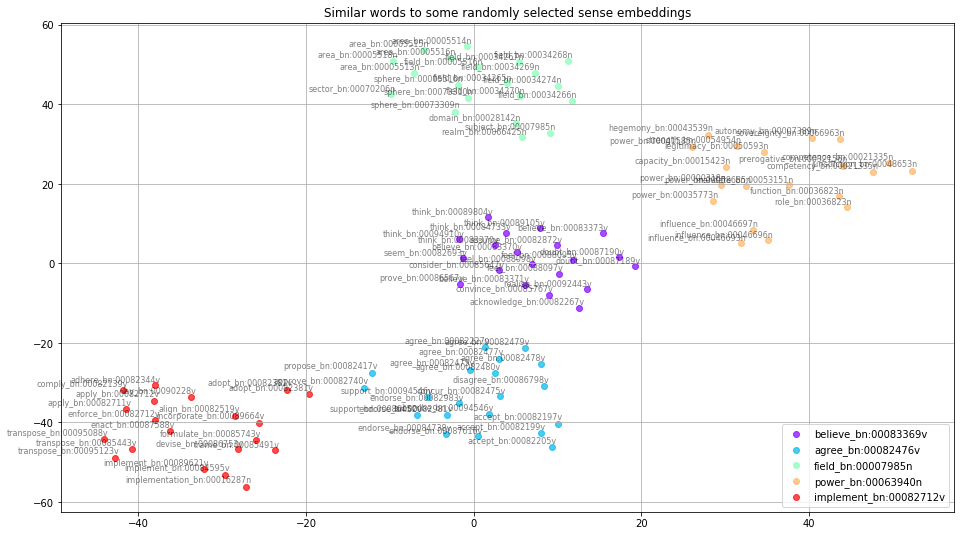

In [6]:
tsne_similar_words_plot('Similar words to some randomly selected sense embeddings', keys, embeddings_en_2d, word_clusters, 0.7, 'similar_words.png')

In [7]:
from sklearn.manifold import TSNE
import numpy as np

keys = ["love", "sex", "smart", "student", "plane", "car"]


embedding_clusters = []
word_clusters = []
for word in keys:
    senses, embeddings = get_first_similar_words(word, model)
    embedding_clusters.append(embeddings)
    word_clusters.append(senses)
    
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

2019-06-06 13:38:05,659 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-06-06 13:38:05,664 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-06-06 13:38:05,670 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-06-06 13:38:05,677 : WARNING : 'c' arg

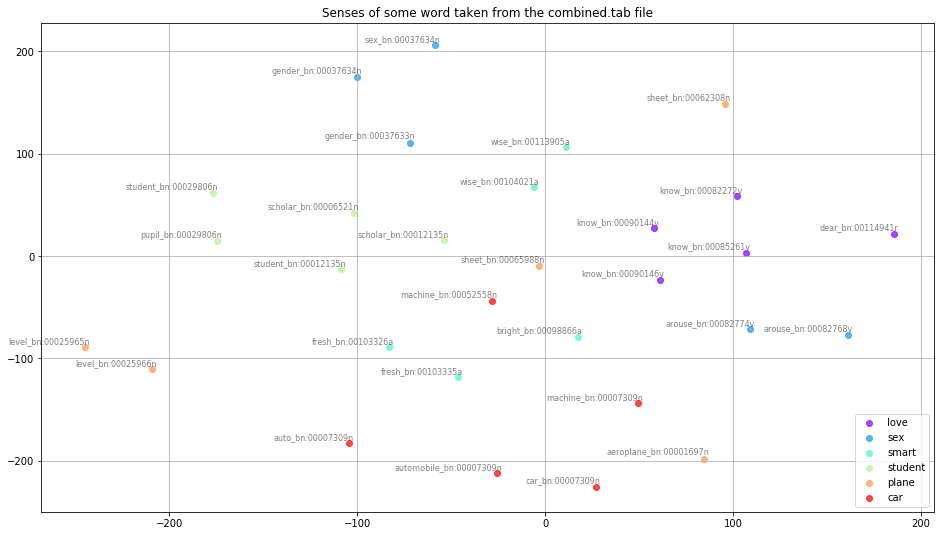

In [8]:
tsne_similar_words_plot('Senses of some word taken from the combined.tab file', keys, embeddings_en_2d, word_clusters, 0.7, 'similar_words2.png')